In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tools
import quad
import bitlist
import sys
import time
from pympler import asizeof
import copy
import math
from datetime import datetime
from datetime import timedelta

In [2]:
d5000 = pd.read_pickle('./data/Data_short_5000.pickle')

In [3]:
d = d5000

In [17]:
len(d[(d.time > datetime.datetime(2008,2,5)) & (d.time < datetime.datetime(2008,2,6))])

70296

In [4]:
def generate_Qs(d, delta_time):
    window = []
    Ws = []
    init_time = datetime(2008,2,2)
    delta = timedelta(hours=delta_time)
    while init_time < datetime(2008, 2, 9):
        end_time = init_time+delta
        Ws.append((init_time, end_time))
        window.append(d[(d.time > init_time) & (d.time <= end_time)])
        init_time += delta
    Qs = []
    for i in range(len(window)):
        print i,'of',len(window)
        w = window[i]
        quad.g_max_nodes = 20
        Q = quad.QuadTree()
        w.index = range(len(w))
        for j in range(len(w)):
            x = w.ix[j]
            Q.insert(x.tid, x.x, x.y)
        Qs.append(Q)
    return Qs, Ws

In [ ]:
Qs_1, Ws_1 = generate_Qs(d, 1)

In [28]:
Qs_1, Ws_1 = generate_Qs(d, 1)

0 of 168
1 of 168
2 of 168
3 of 168
4 of 168
5 of 168
6 of 168
7 of 168
8 of 168
9 of 168
10 of 168
11 of 168
12 of 168
13 of 168
14 of 168
15 of 168
16 of 168
17 of 168
18 of 168
19 of 168
20 of 168
21 of 168
22 of 168
23 of 168
24 of 168
25 of 168
26 of 168
27 of 168
28 of 168
29 of 168
30 of 168
31 of 168
32 of 168
33 of 168
34 of 168
35 of 168
36 of 168
37 of 168
38 of 168
39 of 168
40 of 168
41 of 168
42 of 168
43 of 168
44 of 168
45 of 168
46 of 168
47 of 168
48 of 168
49 of 168
50 of 168
51 of 168
52 of 168
53 of 168
54 of 168
55 of 168
56 of 168
57 of 168
58 of 168
59 of 168
60 of 168
61 of 168
62 of 168
63 of 168
64 of 168
65 of 168
66 of 168
67 of 168
68 of 168
69 of 168
70 of 168
71 of 168
72 of 168
73 of 168
74 of 168
75 of 168
76 of 168
77 of 168
78 of 168
79 of 168
80 of 168
81 of 168
82 of 168
83 of 168
84 of 168
85 of 168
86 of 168
87 of 168
88 of 168
89 of 168
90 of 168
91 of 168
92 of 168
93 of 168
94 of 168
95 of 168
96 of 168
97 of 168
98 of 168
99 of 168
100 of 168

In [5]:
Qs_6, Ws_6 = generate_Qs(d, 6)

0 of 28
1 of 28
2 of 28
3 of 28
4 of 28
5 of 28
6 of 28
7 of 28
8 of 28
9 of 28
10 of 28
11 of 28
12 of 28
13 of 28
14 of 28
15 of 28
16 of 28
17 of 28
18 of 28
19 of 28
20 of 28
21 of 28
22 of 28
23 of 28
24 of 28
25 of 28
26 of 28
27 of 28


In [6]:
Qs_12, Ws_12 = generate_Qs(d, 12)
Qs_36, Ws_36 = generate_Qs(d, 36)
Qs_60, Ws_60 = generate_Qs(d, 60)

0 of 14
1 of 14
2 of 14
3 of 14
4 of 14
5 of 14
6 of 14
7 of 14
8 of 14
9 of 14
10 of 14
11 of 14
12 of 14
13 of 14
0 of 5
1 of 5
2 of 5
3 of 5
4 of 5
0 of 3
1 of 3
2 of 3


In [7]:
Qs_24, Ws_24 = generate_Qs(d, 24)

0 of 7
1 of 7
2 of 7
3 of 7
4 of 7
5 of 7
6 of 7


In [8]:
Qs_48, Ws_48 = generate_Qs(d, 48)

0 of 4
1 of 4
2 of 4
3 of 4


In [21]:
Qs_168, Ws_168 = generate_Qs(d, 168)
Qs_96, Ws_96 = generate_Qs(d, 96)

0 of 1
0 of 2
1 of 2


In [9]:
def trajbase(d, Q, points, page_size, width):
    trajs = Q.meet_trajectories_set(points[0][0]-width, points[0][0]+width, points[0][1]-width, points[0][1]+width)
    for p in points[1:]:
        trajs &= Q.meet_trajectories_set(p[0]-width, p[0]+width, p[1]-width, p[1]+width)
    return trajs
    #return traj_page_num(d, page_size, trajs)

In [15]:
def traj_page_num(d, page_size, traj_tids):
    return sum([ math.ceil(1.0*len(d[d.tid == tid])/page_size) for tid in traj_tids])

from baidumap import Map
m = Map()

def test_case(d, Qs, Ws, addrs, page_size, width, start_time, end_time):
    #print start_time, end_time
    points = []
    for addr in addrs:
        p = m.getLocation(addr, '北京')
        #print p[1], p[0]
        points.append( (p[1], p[0]) )
    
    t1 = time.time()
    trajbase_set = set()
    for i in range(len(Ws)):
        #print Ws[i][0], Ws[i][1]
        if not (Ws[i][1] <= start_time or Ws[i][0] >= end_time):
            #print Ws[i][0], Ws[i][1]
            trajbase_set |= trajbase(d, Qs[i], points, page_size, width)
    trajbase_rst = traj_page_num(d, page_size, trajbase_set)
    trajbase_time = time.time() - t1
    
    
    print 'trajbase_set:',len(trajbase_set), 'trajbase disk IO:',trajbase_rst,'time:',trajbase_time
    return {'#candidate':len(trajbase_set), '#diskIO':trajbase_rst,'time':trajbase_time}
    #return pos_traj_set, pos_traj(d, G, points, page_size, width)

In [29]:
# Disk IO vs. time window
def time_index_test(d, Qss, Wss, start_time, end_time, page_size=100):
    width = 0.01
    addrs = ["西单", "三里屯"]
    ans = {}
    for i in range(len(Qss)):
        ans[i] = test_case(d, Qss[i], Wss[i], addrs, page_size, width, start_time, end_time)
    return ans

ans = time_index_test(d, [Qs_1, Qs_6, Qs_12, Qs_24, Qs_36, Qs_48, Qs_60, Qs_96, Qs_168], [Ws_1, Ws_6, Ws_12, Ws_24, Ws_36, Ws_48, Ws_60, Ws_96, Ws_168], datetime(2008,2,4,18), datetime(2008,2,5,8))

trajbase_set: 79 trajbase disk IO: 154.0 time: 0.423564910889
trajbase_set: 39 trajbase disk IO: 160.0 time: 0.20774102211
trajbase_set: 34 trajbase disk IO: 76.0 time: 0.203287124634
trajbase_set: 49 trajbase disk IO: 128.0 time: 0.261370897293
trajbase_set: 55 trajbase disk IO: 151.0 time: 0.293760061264
trajbase_set: 35 trajbase disk IO: 100.0 time: 0.187345027924
trajbase_set: 45 trajbase disk IO: 196.0 time: 0.263199090958
trajbase_set: 48 trajbase disk IO: 127.0 time: 0.258228063583
trajbase_set: 74 trajbase disk IO: 520.0 time: 0.421226978302


In [30]:
ans_pd = pd.DataFrame(ans).T
ans_pd.index = [1, 6,12,24,36,48,60,96,168]
ans_pd

,#candidate,#diskIO,time
1,79,154,0.423565
6,39,160,0.207741
12,34,76,0.203287
24,49,128,0.261371
36,55,151,0.293760
48,35,100,0.187345
60,45,196,0.263199
96,48,127,0.258228
168,74,520,0.421227


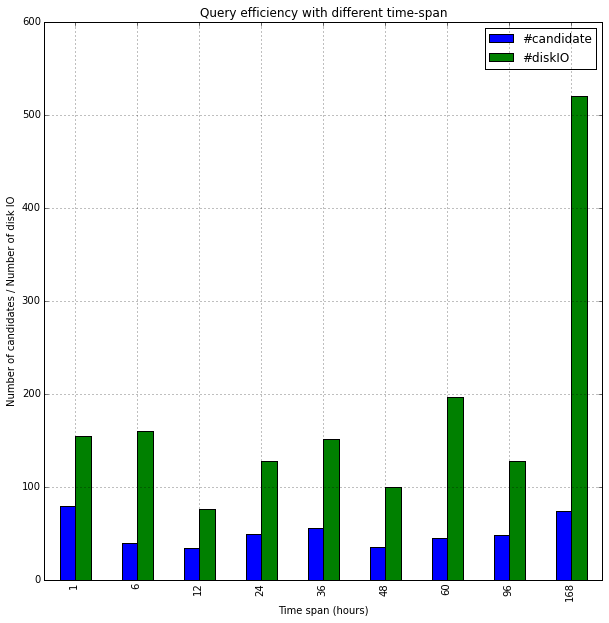

In [53]:
a = ans_pd[['#candidate','#diskIO']].plot(figsize=(10,10), title = 'Query efficiency with different time-span',kind='bar')
a.set_ylabel('Number of candidates / Number of disk IO')
a.set_xlabel('Time span (hours)')

In [27]:
volume = []
for Qs in [Qs_1, Qs_6, Qs_12, Qs_24, Qs_36, Qs_48, Qs_60, Qs_96, Qs_168]:
    volume.append(asizeof.asizeof(Qs))
volume

[69638928,
 75507112,
 81923992,
 86644032,
 90221672,
 93040600,
 98992712,
 107047912]

In [46]:
volume_pd = pd.DataFrame(volume, columns=['size'], index=[1, 6,12,24,36,48,60,96,168])

In [47]:
volume_pd = volume_pd/1024/1024

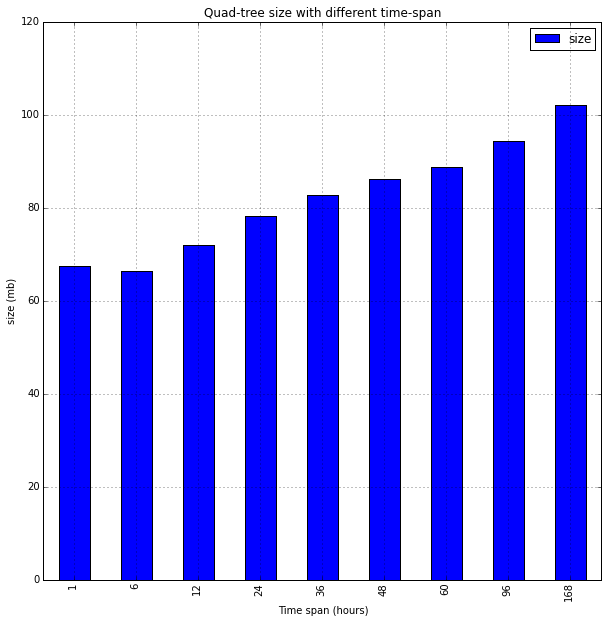

In [51]:
a = volume_pd.plot(figsize=(10,10), title = 'Quad-tree size with different time-span',kind='bar')
a.set_ylabel('size (mb)')
a.set_xlabel('Time span (hours)')

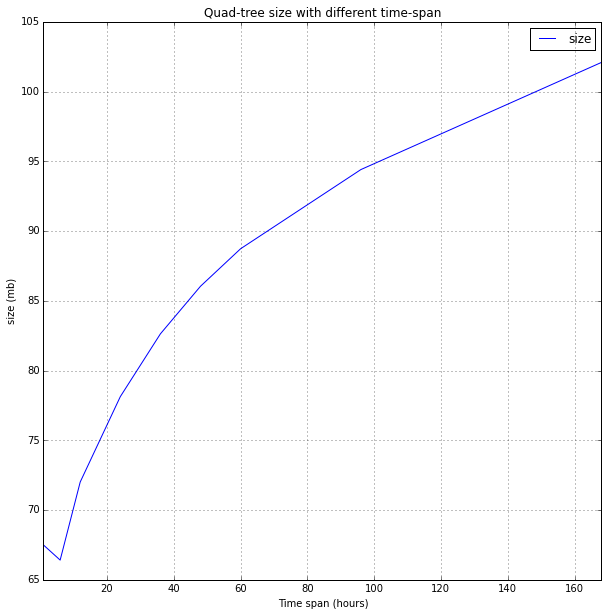

In [52]:
a = volume_pd.plot(figsize=(10,10), title = 'Quad-tree size with different time-span',kind='line')
a.set_ylabel('size (mb)')
a.set_xlabel('Time span (hours)')

In [ ]:
bitlist

In [61]:
Ass = []
#time_interval = 32
traj_num = 5000
Bss = []
for Qs in [Qs_1, Qs_6, Qs_12, Qs_24, Qs_36, Qs_48, Qs_60, Qs_96, Qs_168]:
    As = []
    idx = 0
    bit_size = 0
    for Q in Qs:
        #print idx
        idx += 1
        l = Q.generate_leaf_list()
        i = 0
        while i != len(l):
            if l[i] == []:
                del l[i]
            else:
                i += 1
        print len(l)
        A = np.zeros((len(l), traj_num+1), dtype=bool)
        for i in range(len(l)):
            for t in l[i]:
                A[i][t] = 1
        As.append(A)
        bit_size += bitlist.filled_bits(A, 32)
    Ass.append(As)
    Bss.append(bit_size)

0
0
0
0
0
0
0
0
0
0
0
0
0
33
48
45
46
53
56
47
49
46
48
50
50
46
38
30
20
14
18
25
25
38
44
37
47
45
45
42
52
43
40
47
56
46
51
47
35
29
25
21
16
13
16
16
22
39
44
64
51
52
44
39
42
41
51
31
35
45
47
51
54
45
36
25
23
16
17
17
19
40
49
48
58
53
48
45
43
38
38
45
40
43
35
27
25
18
20
11
11
8
11
14
17
18
16
25
37
33
31
33
30
33
29
22
26
19
17
19
13
11
18
12
19
10
10
10
10
11
16
17
29
30
31
27
29
31
30
27
34
20
27
20
17
9
27
11
11
11
11
11
14
17
22
26
26
30
26
21
26
19
0
0
0
0
0
0
0
0
314
471
203
176
418
411
139
245
361
356
192
187
383
313
75
71
233
122
67
59
188
209
70
70
137
0
0
1047
514
1147
506
920
512
872
183
461
142
564
178
137
1047
2070
1887
1835
879
830
446
1875
3811
2319
1791
446
3743
4651
2310
446
4928
5191
1750
9931
3424
15410


In [57]:
len(Ass)

9

In [58]:
Ass[0]

[array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([], shape=(0, 5001), dtype=bool),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False

In [62]:
Bss

[36163, 53843, 69794, 83974, 93853, 100755, 106315, 117902, 133659]